In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("country_table.csv")
df.head()

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11


In [6]:
df.set_index("Countries", inplace=True)

<AxesSubplot:ylabel='Countries'>

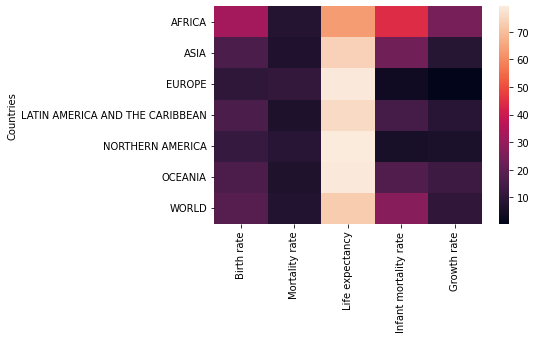

In [8]:
sns.heatmap(df)

<AxesSubplot:>

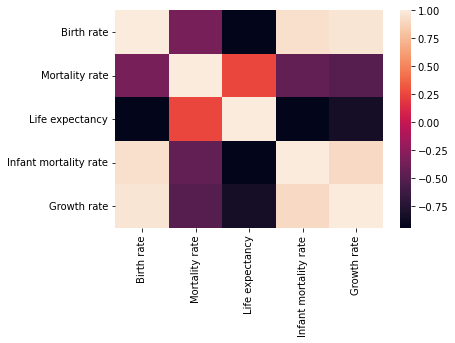

In [7]:
sns.heatmap(df.corr())

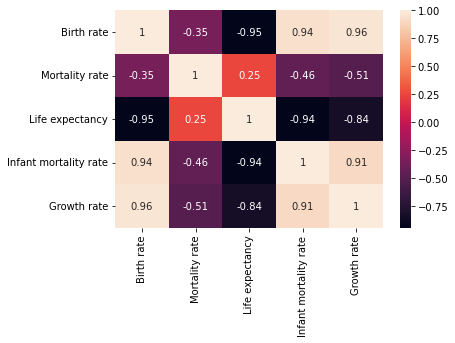

In [10]:
sns.heatmap(df.corr(), annot=True);

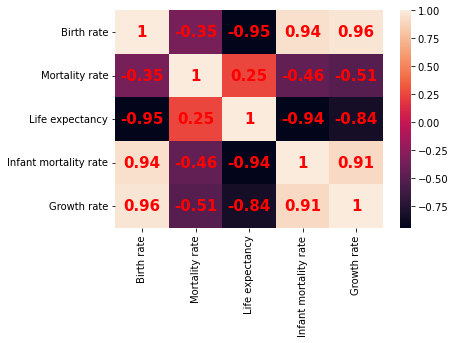

In [17]:
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize" : 15, "color":"red", "fontweight": "bold"});

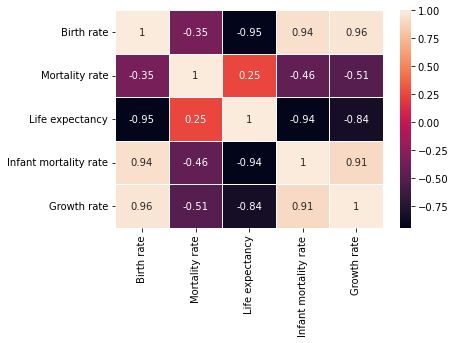

In [21]:
sns.heatmap(df.corr(), annot=True, lw=0.5);

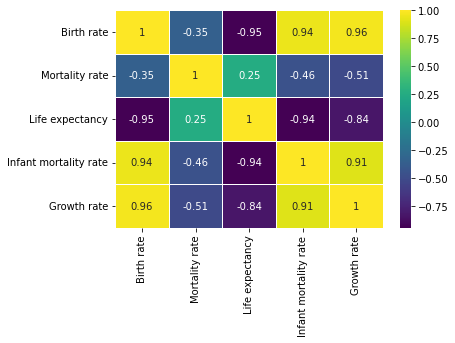

In [22]:
sns.heatmap(df.corr(), annot=True, lw=0.5, cmap="viridis");

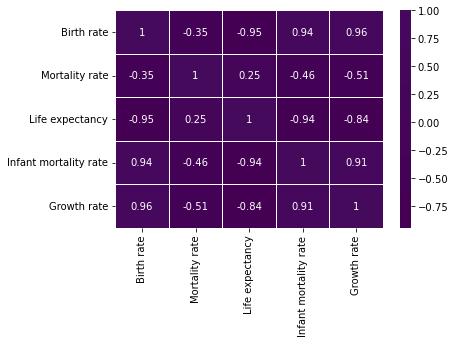

In [26]:
sns.heatmap(df.corr(), annot=True, lw=0.5, cmap="viridis", center=40);

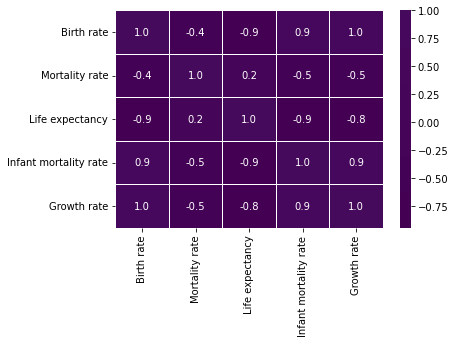

In [42]:
sns.heatmap(df.corr(), annot=True, lw=0.5, cmap="viridis", center=40, fmt=".1f");

## Clustermap

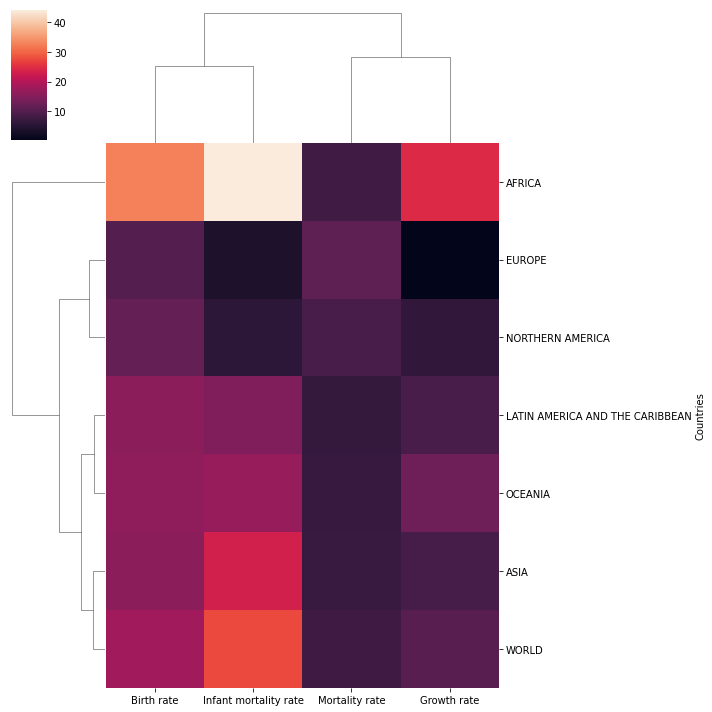

In [29]:
rates = df.drop("Life expectancy", axis=1)
sns.clustermap(rates)

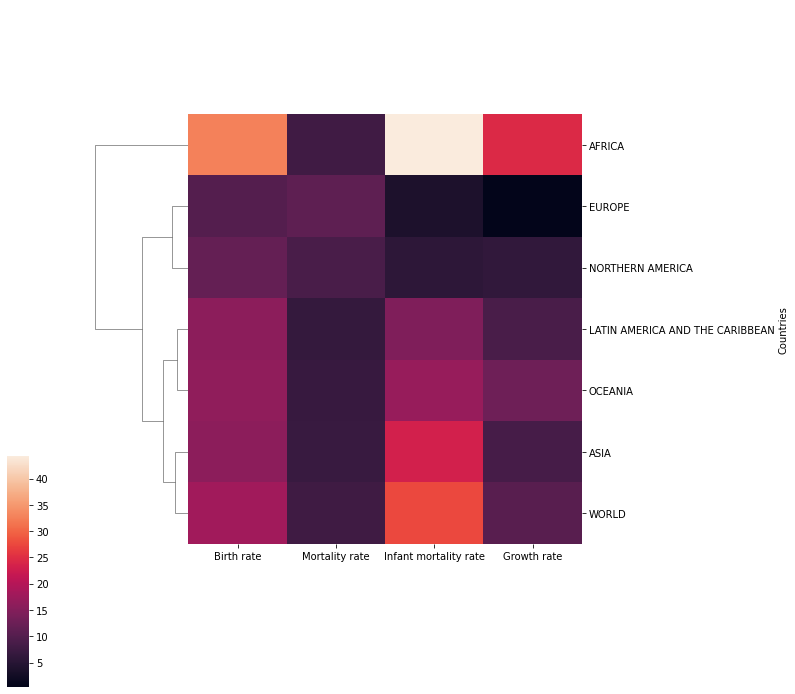

In [34]:
sns.clustermap(rates, col_cluster=False, figsize=(10,8), cbar_pos=(-0.1,-0.2,0.03, 0.4));

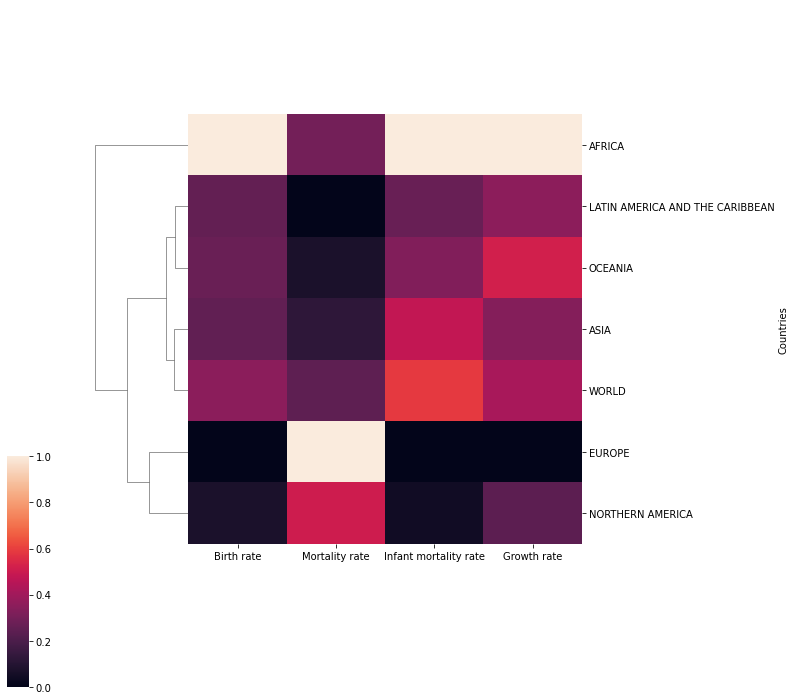

In [35]:
sns.clustermap(rates, col_cluster=False, figsize=(10,8), cbar_pos=(-0.1,-0.2,0.03, 0.4), standard_scale=1);

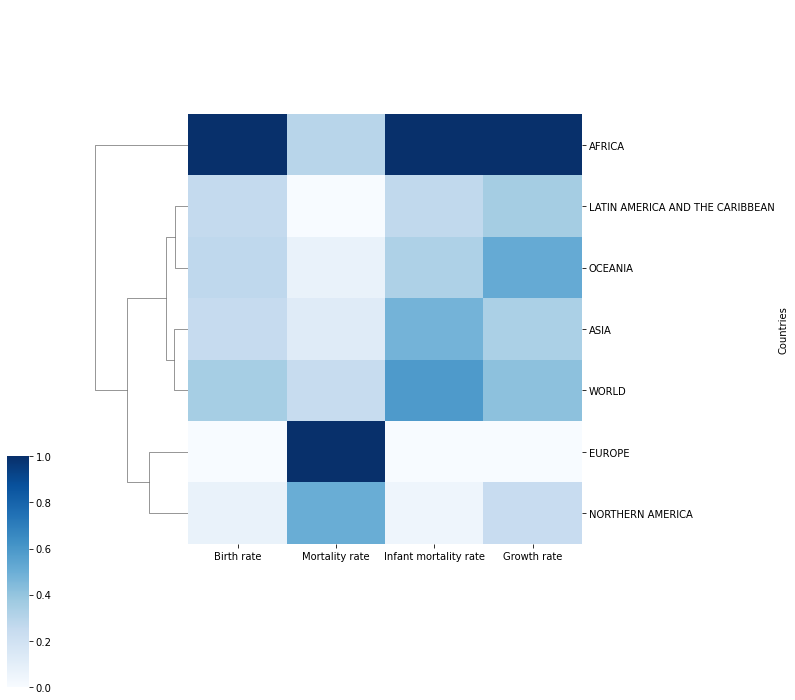

In [36]:
sns.clustermap(rates, col_cluster=False, figsize=(10,8), cbar_pos=(-0.1,-0.2,0.03, 0.4), standard_scale=1, cmap="Blues");

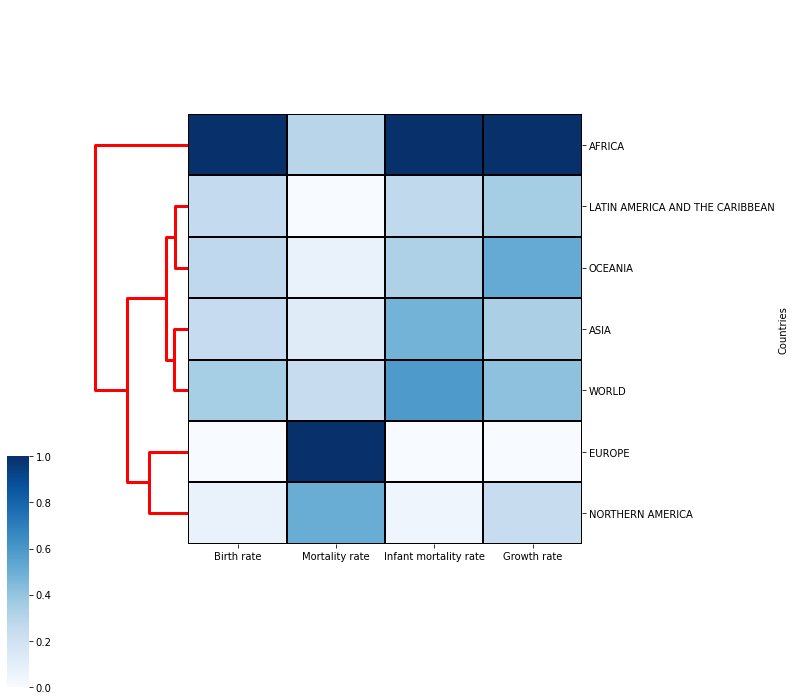

In [41]:
sns.clustermap(rates, col_cluster=False, figsize=(10,8),
               cbar_pos=(-0.1,-0.2,0.03, 0.4),
               standard_scale=1,
               cmap="Blues",
               lw=2,
               linecolor="black",
              tree_kws={"lw":3, "color":"red"}
              );

## Jointgrid

In [43]:
cars = sns.load_dataset("mpg")

In [44]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


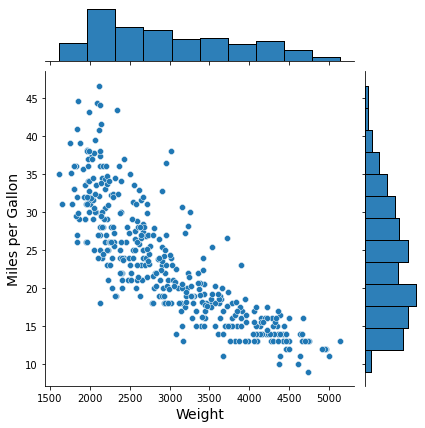

In [52]:
g = sns.jointplot(data=cars, x="weight", y="mpg")
g.plot(sns.scatterplot, sns.histplot)
g.set_axis_labels(xlabel="Weight", ylabel="Miles per Gallon", fontsize=14);

## Pairgrid

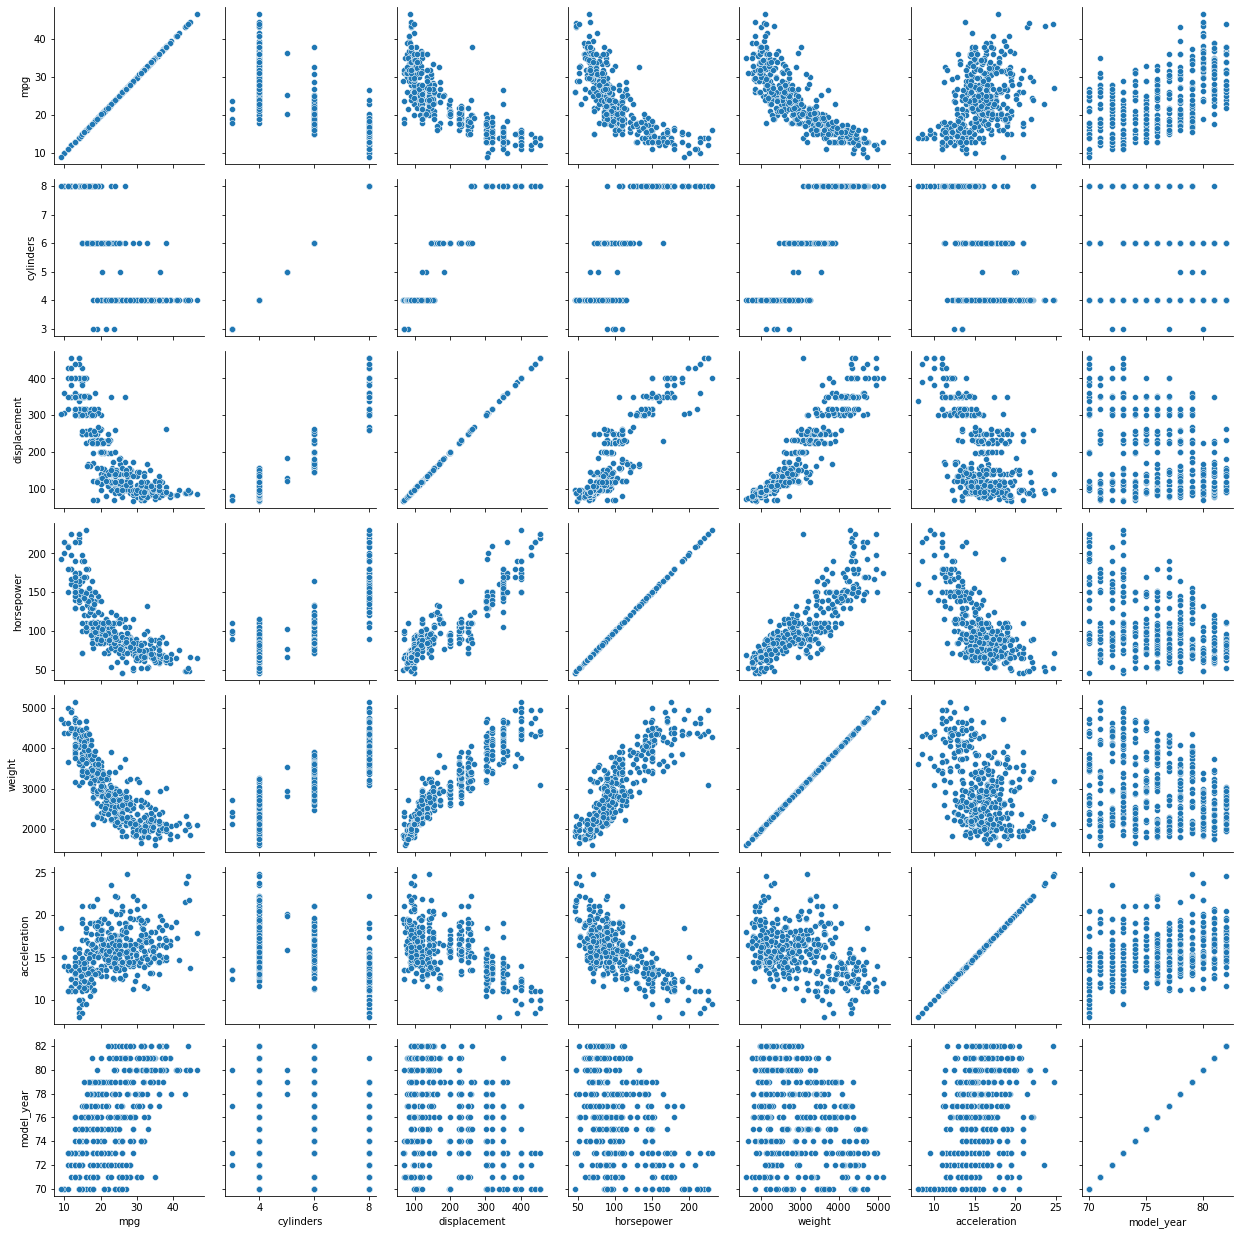

In [57]:
g = sns.PairGrid(cars)
g.map(sns.scatterplot);

In [59]:
df = cars[["weight", "mpg", "horsepower"]]
df.head()

,weight,mpg,horsepower
0,3504,18.0,130.0
1,3693,15.0,165.0
2,3436,18.0,150.0
3,3433,16.0,150.0
4,3449,17.0,140.0


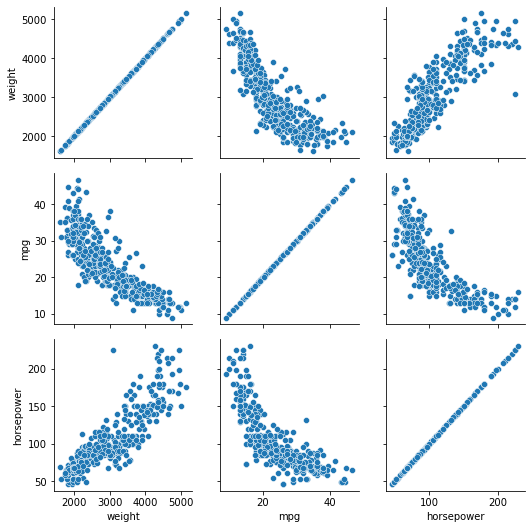

In [60]:
g = sns.PairGrid(df)
g.map(sns.scatterplot);

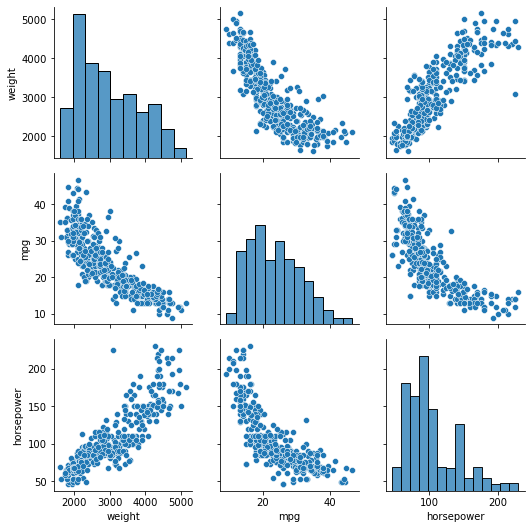

In [62]:
g = sns.PairGrid(df)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot);

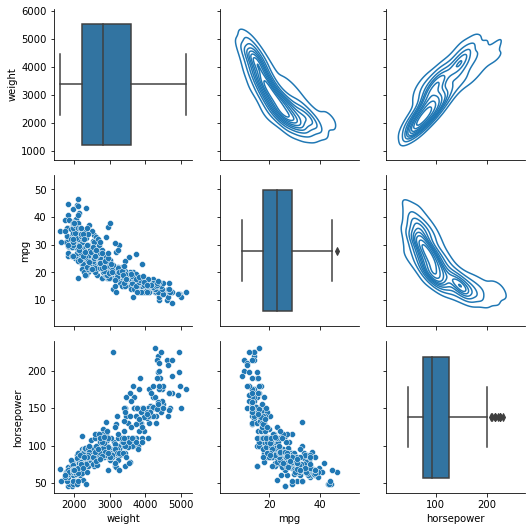

In [64]:
g=sns.PairGrid(df)
g.map_lower(sns.scatterplot)
g.map_diag(sns.boxplot)
g.map_upper(sns.kdeplot);

In [65]:
df = cars[["weight", "mpg", "horsepower", "origin"]]
df.head()

,weight,mpg,horsepower,origin
0,3504,18.0,130.0,usa
1,3693,15.0,165.0,usa
2,3436,18.0,150.0,usa
3,3433,16.0,150.0,usa
4,3449,17.0,140.0,usa


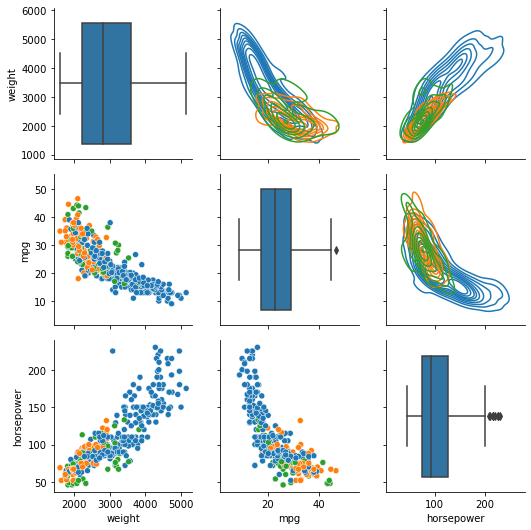

In [67]:
g=sns.PairGrid(df, hue="origin")
g.map_lower(sns.scatterplot)
g.map_diag(sns.boxplot)
g.map_upper(sns.kdeplot);

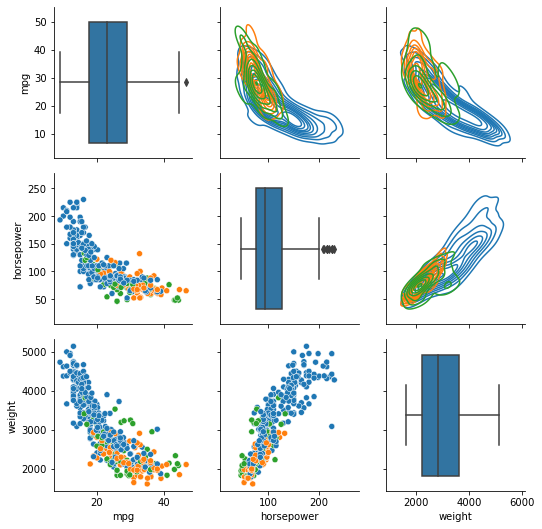

In [68]:
g=sns.PairGrid(cars, hue="origin", vars=["mpg", "horsepower", "weight"])
g.map_lower(sns.scatterplot)
g.map_diag(sns.boxplot)
g.map_upper(sns.kdeplot);

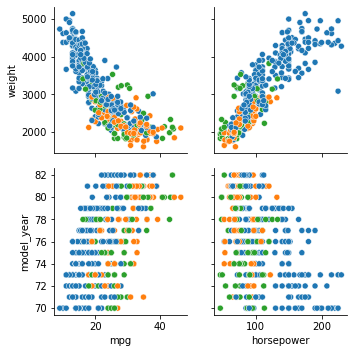

In [73]:
g=sns.PairGrid(cars, hue="origin", 
               x_vars=["mpg", "horsepower"],
               y_vars=["weight", "model_year"])
g.map(sns.scatterplot);
